# 크롤링

### 인터넷에서 정보 수집 
- SNS , 웹사이트

### 크롤링
- 스크레이핑  : 인간 사용자를 위해 제공된 웹페이지
- API 기반 정보수집 : 프로그램을 위한 정보 제공  API가 존재

# Naver crawling

## 개발자 센터 가입

http://developers.naver.com

- 서비스 api 선택
- 오픈 api 이용 신청

어플리케이션 등록

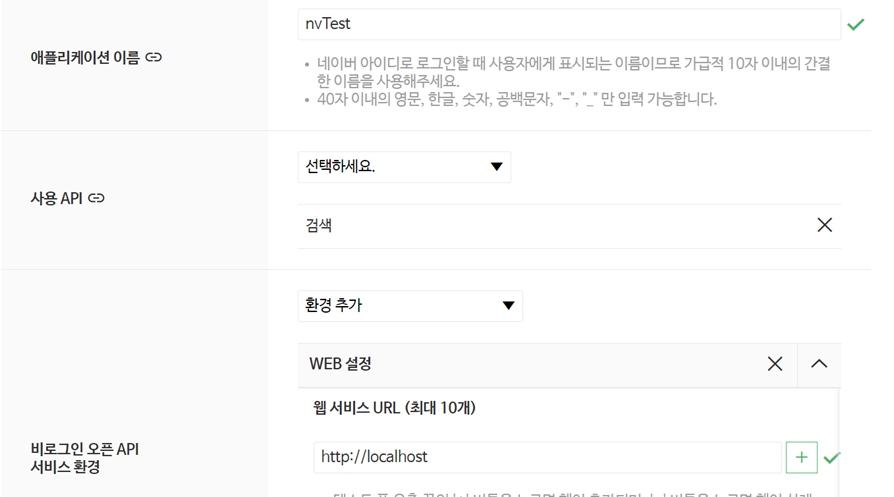





## id와 키 설정

In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json

# 반드시 자기 id 넣기 
client_id = 'Mph24ud5oPOsobrHyqqC'
client_secret = 'wXEjIFuLka'

LEC=True

네이버 크롤링 구조

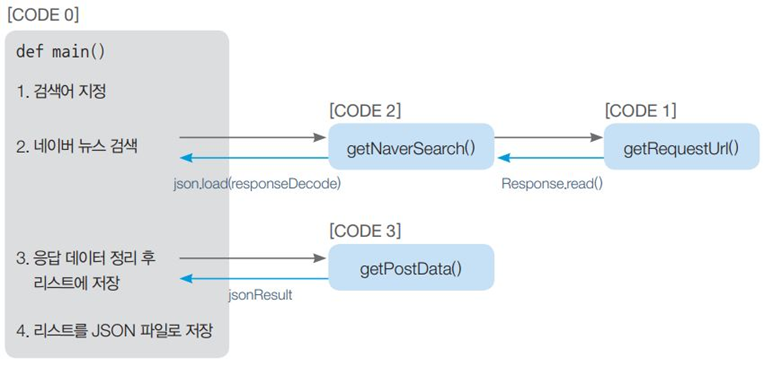

## urllib  





In [2]:

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:  #정상실행
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

- url 구성

https://developers.naver.com/docs/search/blog/ 참조

- 쿼리 string  구성

q = urllib.parse.quote("검색할 단어")

https://openapi.naver.com/v1/search/blog.json?query=q&display=2

In [3]:
if LEC:
    q= urllib.parse.quote("인공지능")
    
    url = "https://openapi.naver.com/v1/search/blog.json?query=%s&display=2"%q
    
    print (url)
    resp = getRequestUrl(url)

    print (resp)


https://openapi.naver.com/v1/search/blog.json?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&display=2
[2021-03-21 17:21:25.561457] Url Request Success
{
"lastBuildDate": "Sun, 21 Mar 2021 17:21:25 +0900",
"total": 1289850,
"start": 1,
"display": 2,
"items": [
{
"title": "<b>인공지능</b> AI 관련주 미래를 생각하며 대비",
"link": "https:\/\/blog.naver.com\/jjy951128?Redirect=Log&logNo=222280476434",
"description": "<b>인공지능</b> AI 관련주 핵심 분석! 최근 들어, 국내 증시가 점점 상승하고 있는데요. 투자에 진입하시는... 그중에서도 요즘 관심을 받고 있는 분야는 단연 <b>인공지능</b>입니다. 뉴스만 보더라도 개발 소식을 쉽게... ",
"bloggername": "팩폭 리뷰어",
"bloggerlink": "https://blog.naver.com/jjy951128",
"postdate": "20210319"

},
{
"title": "<b>인공지능</b> 'Ai-Da'가 여는 전시회",
"link": "https:\/\/blog.naver.com\/designpress2016?Redirect=Log&logNo=222278420484",
"description": "회화, 조각, 그리고 퍼포먼스까지 시도하는 AI 첨단 기술의 발전으로 <b>인공지능</b>이 자연스럽게 일상에 스며들게 되었다. 이제는 <b>인공지능</b>이 디자이너로서 디자인 분야에 참여하기도 한다. SF 영화처럼... ",
"bloggername": "네이버 디자인",
"bloggerlink": "https://blog.naver.com/designpress2016",
"postdate": 

## json load 

string인 결과를 객체로 loading하여 처리 

In [4]:
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    #url = f"https://openapi.naver.com/v1/search/movie.json?query={movie}&genre={Genre}&display=20" 
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

In [5]:
if LEC :
    jobj=getNaverSearch("blog", "인공지능", 10, 1)
    print(  jobj['items'][0] )

[2021-03-21 17:21:27.640049] Url Request Success
{'title': 'AI <b>인공지능</b> 영위하는 다양한 기업들', 'link': 'https://blog.naver.com/saver56angel?Redirect=Log&logNo=222257452673', 'description': '오늘은 요즘 꾸준히 화두에 오르는 AI <b>인공지능</b> 분야에 관련된 이야기를 할꺼랍니다. 에이아이라고 하는게 사람의 지능을 흉내 내는 소프트웨어, 프로그램, 인공적인 장치 모두를 말하는건데 4차 산업혁명의... ', 'bloggername': '&해달이 소소한 일상 이야기&', 'bloggerlink': 'https://blog.naver.com/saver56angel', 'postdate': '20210226'}


## 결과 가공


In [6]:
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

In [7]:
if LEC:
    p=[]
    jobj=getNaverSearch("news", "인공지능", 10, 1)
    print (jobj)
    getPostData( jobj['items'][0], p, 1 )
    print (p)

[2021-03-21 17:21:28.937617] Url Request Success
{'lastBuildDate': 'Sun, 21 Mar 2021 17:21:28 +0900', 'total': 1093149, 'start': 10, 'display': 1, 'items': [{'title': "삼성전자, '2021년 삼성 주니어 SW 아카데미' 개강", 'originallink': 'http://www.newscj.com/news/articleView.html?idxno=840384', 'link': 'http://www.newscj.com/news/articleView.html?idxno=840384', 'description': "2013년부터 국내 소프트웨어 교육 저변 확대와 미래인재 양성을 위해 실시하고 있는 소프트웨어 교육 프로그램인 '삼성 주니어 SW 아카데미'는 올해부터 교육 현장의 수요를 반영해 <b>인공지능</b>(AI) 교육을 실시한다.... ", 'pubDate': 'Sun, 21 Mar 2021 16:53:00 +0900'}]}
[{'cnt': 1, 'title': "삼성전자, '2021년 삼성 주니어 SW 아카데미' 개강", 'description': "2013년부터 국내 소프트웨어 교육 저변 확대와 미래인재 양성을 위해 실시하고 있는 소프트웨어 교육 프로그램인 '삼성 주니어 SW 아카데미'는 올해부터 교육 현장의 수요를 반영해 <b>인공지능</b>(AI) 교육을 실시한다.... ", 'org_link': 'http://www.newscj.com/news/articleView.html?idxno=840384', 'link': 'http://www.newscj.com/news/articleView.html?idxno=840384', 'pDate': '2021-03-21 16:53:00'}]


In [13]:

def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100) 
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)      
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100) 
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 인공지능
[2021-03-21 17:23:21.420000] Url Request Success
[2021-03-21 17:23:21.628819] Url Request Success
[2021-03-21 17:23:21.847679] Url Request Success
[2021-03-21 17:23:22.062935] Url Request Success
[2021-03-21 17:23:22.292992] Url Request Success
[2021-03-21 17:23:22.521618] Url Request Success
[2021-03-21 17:23:22.747642] Url Request Success
[2021-03-21 17:23:22.959606] Url Request Success
[2021-03-21 17:23:23.190748] Url Request Success
[2021-03-21 17:23:23.420763] Url Request Success
HTTP Error 400: Bad Request
[2021-03-21 17:23:23.511332] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&start=1001&display=100
전체 검색 : 1093150 건
가져온 데이터 : 1000 건
인공지능_naver_news.json SAVED


In [21]:
import os
import sys
import requests

#네이버 영화 API 키 값
client_id = 'Mph24ud5oPOsobrHyqqC'
client_secret = 'wXEjIFuLka'


movie='어벤저스'
header_parms ={"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}
url = f"https://openapi.naver.com/v1/search/movie.json?query={movie}"
res=requests.get(url,headers=header_parms)
data =res.json()

#데이터 전처리
title=data['items'][0]['title'].strip('</b>')
link=data['items'][0]['link']
date=data['items'][0]['pubDate']
director=data['items'][0]['director'].split('|')[0]
actors=data['items'][0]['actor'].split('|')[:-1]
rating=float(data['items'][0]['userRating'])

import pandas as pd
df=pd.DataFrame([title,link,date,director,actors,rating]).T
df.columns=['영화 제목','네이버 링크','개봉 년도','감독','출연진','평점']
df

,영화 제목,네이버 링크,개봉 년도,감독,출연진,평점
0,어벤져스: 엔드게임,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2019,안소니 루소,"[로버트 다우니 주니어, 크리스 에반스, 크리스 헴스워스, 마크 러팔로, 스칼릿 조...",9.38


In [22]:
import os
import sys
import requests
import pandas as pd

Genre = input('검색어를 입력하세요: ')
movie='연애'
header_parms ={"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}
url = f"https://openapi.naver.com/v1/search/movie.json?query={movie}&genre={Genre}&display=20"
res=requests.get(url,headers=header_parms)
data =res.json()

titles=[]
links=[]
dates=[]
directors=[]
actors=[]
ratings=[]

for i in data['items']:
    titles.append(i['title'].strip('</b>').replace('<b>','').replace('</b>',''))
    links.append(i['link'])
    dates.append(i['pubDate'])
    directors.append(i['director'].split('|')[0])
    actors.append(i['actor'].split('|')[:-1])
    ratings.append(float(i['userRating']))
    
df2=pd.DataFrame([titles,links,dates,directors,actors,ratings]).T
df2.columns=['영화 제목','네이버 링크','개봉 년도','감독','출연진','평점']
df2

검색어를 입력하세요: 4


,영화 제목,네이버 링크,개봉 년도,감독,출연진,평점
0,연애기담집,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2017,쿠라모토 라이타,"[야오 아이닌, 와다 소코]",0.0
1,괴기 연애작전,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2015,시라이시 카즈야,"[아소 구미코, 사카이 마키, 오가와 타마키, 나카무라 토오루, 오오쿠라 코지, 이...",10.0


## 과제 1 : 네이버 영화 검색 중 아래 장르 하나를 선택하여, 최신 영화 순으로 20개의 제목을 출력하는 프로그램을 작성하시오 (hw-03.ipynb로 제출) 

1: 드라마 2: 판타지
3: 서부 4: 공포
5: 로맨스 6: 모험
7: 스릴러 8: 느와르
9: 컬트 10: 다큐멘터리



In [17]:
import os
import sys
import requests  #http요청을 보내는 모듈
import pandas as pd

client_id = 'Mph24ud5oPOsobrHyqqC'
client_secret = 'wXEjIFuLka'

Genre = input('검색어를 입력하세요: ')
movie='사랑'
header_client ={"X-Naver-Client-Id":client_id,"X-Naver-Client-Secret":client_secret}
url = f"https://openapi.naver.com/v1/search/movie.json?query={movie}&genre={Genre}&display=20"  #f-string
temp=requests.get(url,headers=header_client)  #url주소에 별도의 헤더를 추가해서 정보 요청
data =temp.json()

titles=[]
dates=[]

for i in data['items']:
    titles.append(i['title'].strip('</b>').replace('<b>','').replace('</b>',''))  #strip : 공백제거
    dates.append(i['pubDate'])
    
df=pd.DataFrame([titles, dates]).T  #행과 열을 바꾼 DataFrame
df.columns=['영화 제목','개봉 년도']
df

검색어를 입력하세요: 5


,영화 제목,개봉 년도
0,내가 사랑했던 모든 남자들에게: 언제나 그리고 영원히,2021
1,오타쿠에게 사랑은 어려워,2020
2,하녀: 금지된 사랑,2020
3,사랑의 정비소,2020
4,하모니 밸리에서의 사랑,2020
5,사랑의 유효기간,2020
6,사랑하고 있습니까,2019
7,9월의 사랑과 만날 때까지,2019
8,양과 늑대의 사랑과 살인,2019
9,사랑하지 않는 자들의 최후,2019




# Facebook API 활용

## OAuth

사용자의 동의를 얻어 사용자의 정보를 가져오는데 주로 활용

- 기본 구조

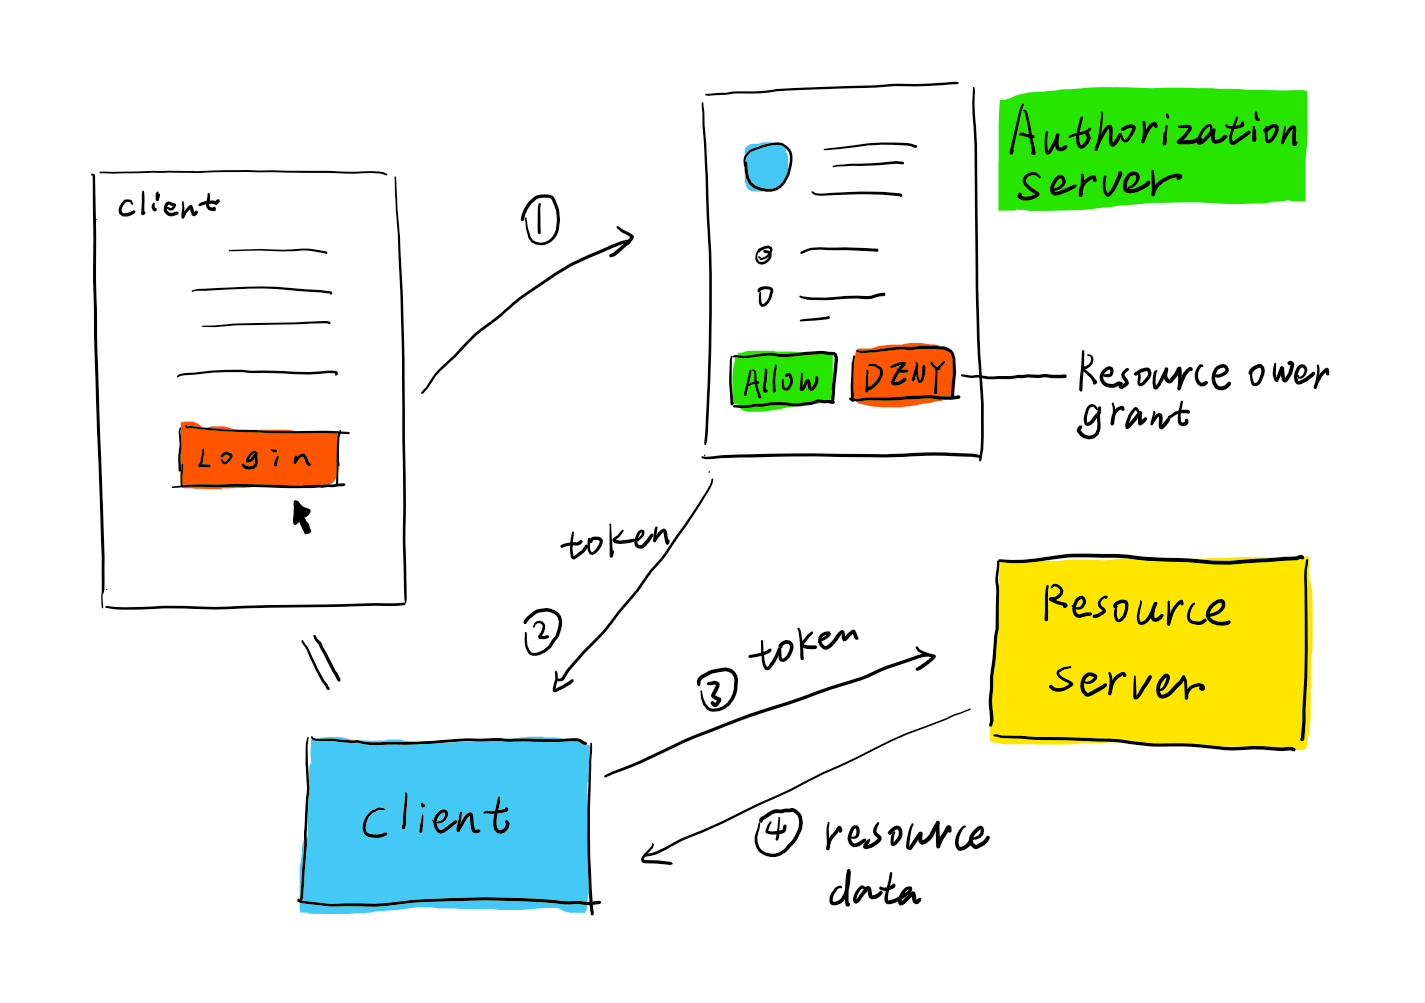

- 상세구조

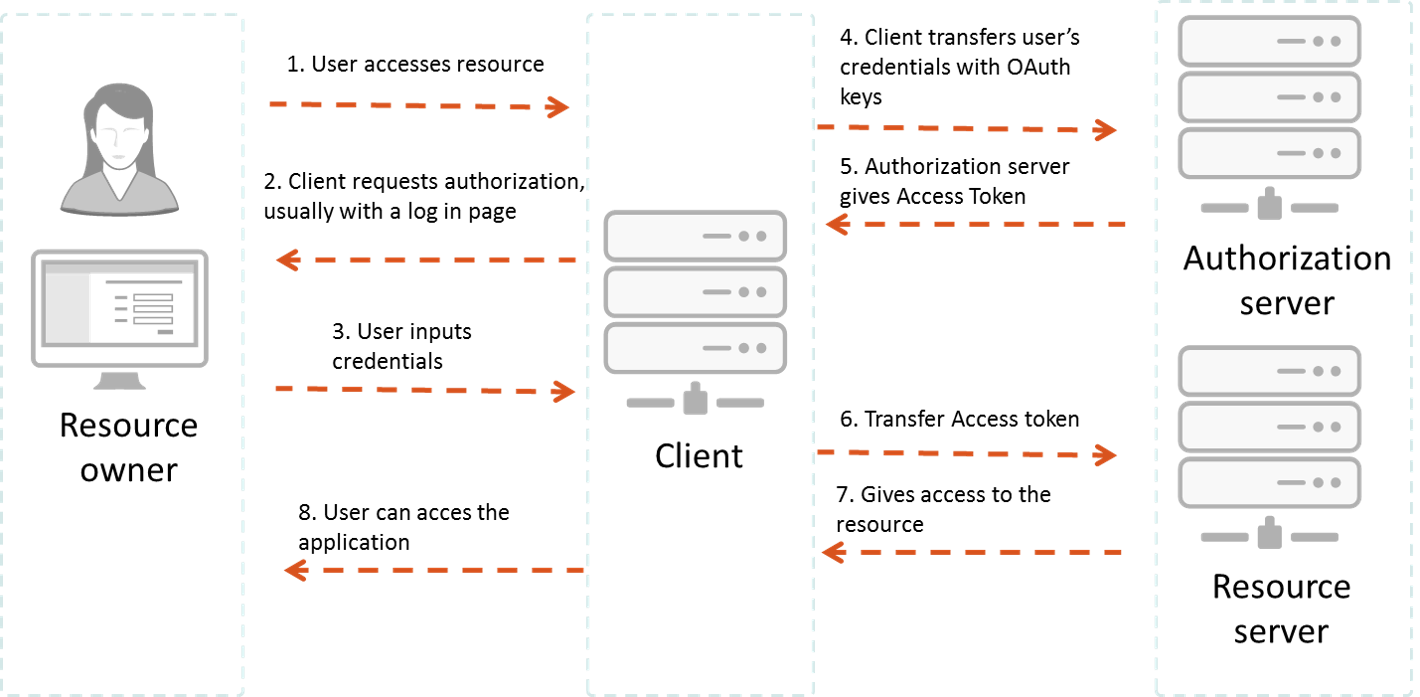

## facebook 개발자 등록, app 등록

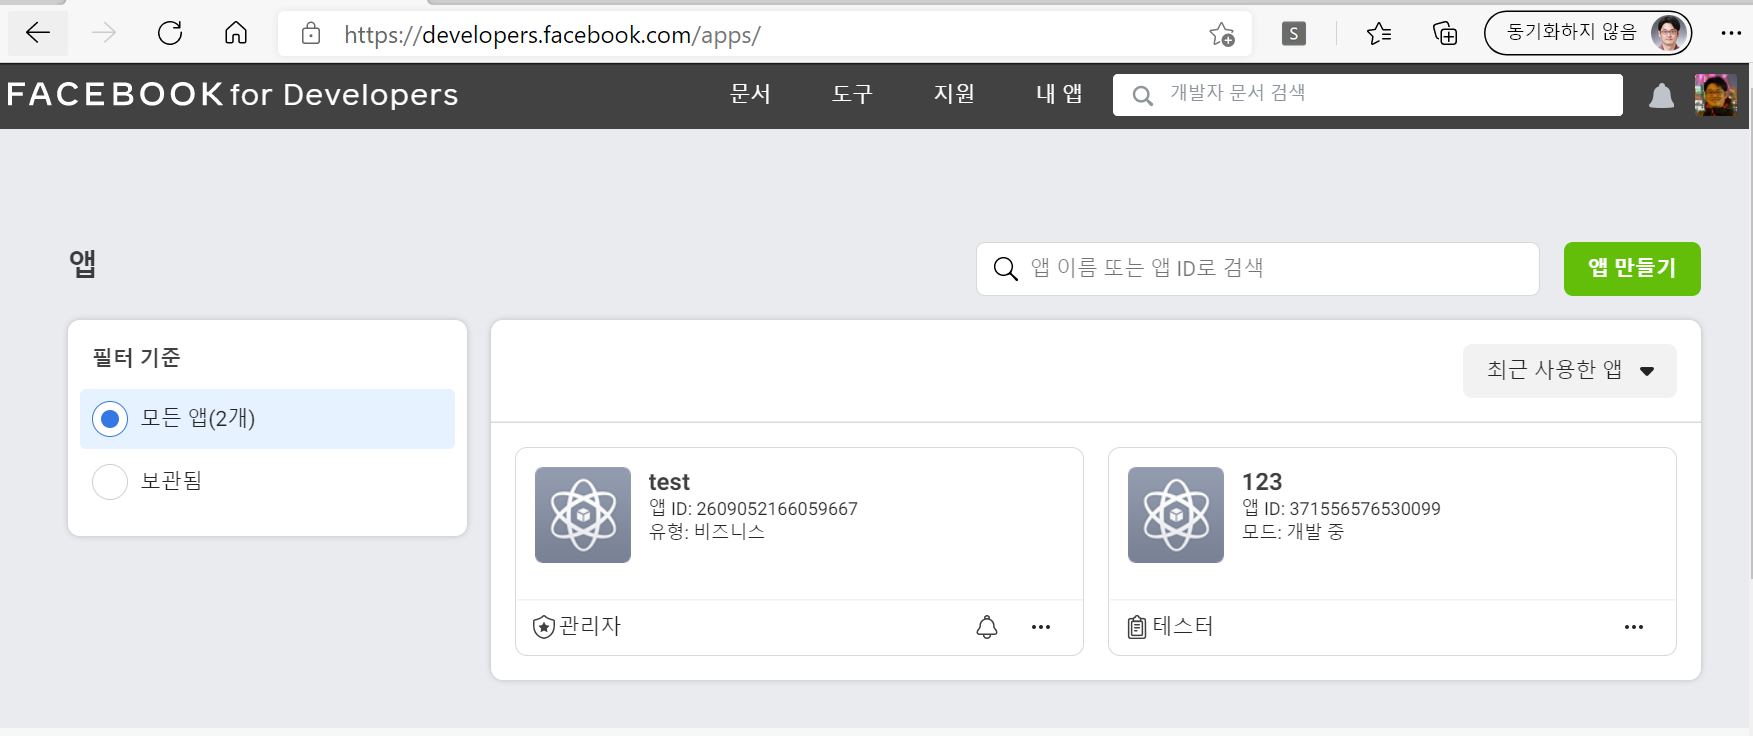

## token 획득 및 api 테스트

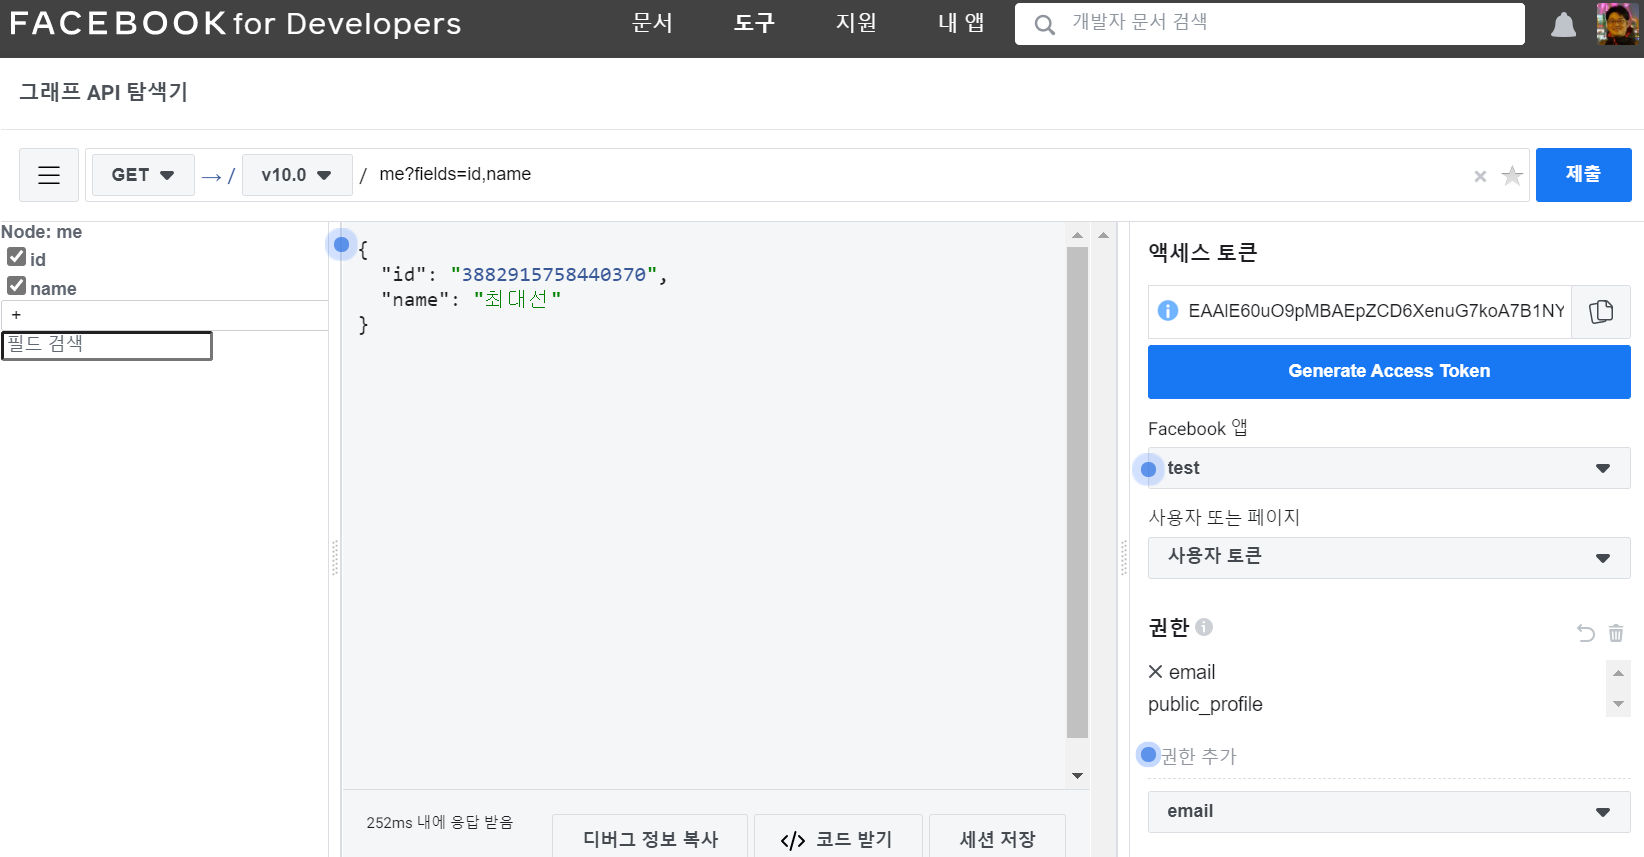

## api  활용 python code 

참조 문서 : 

https://developers.facebook.com/docs/graph-api

https://facebook-sdk.readthedocs.io/en/latest/api.html


### facebook sdk 설치

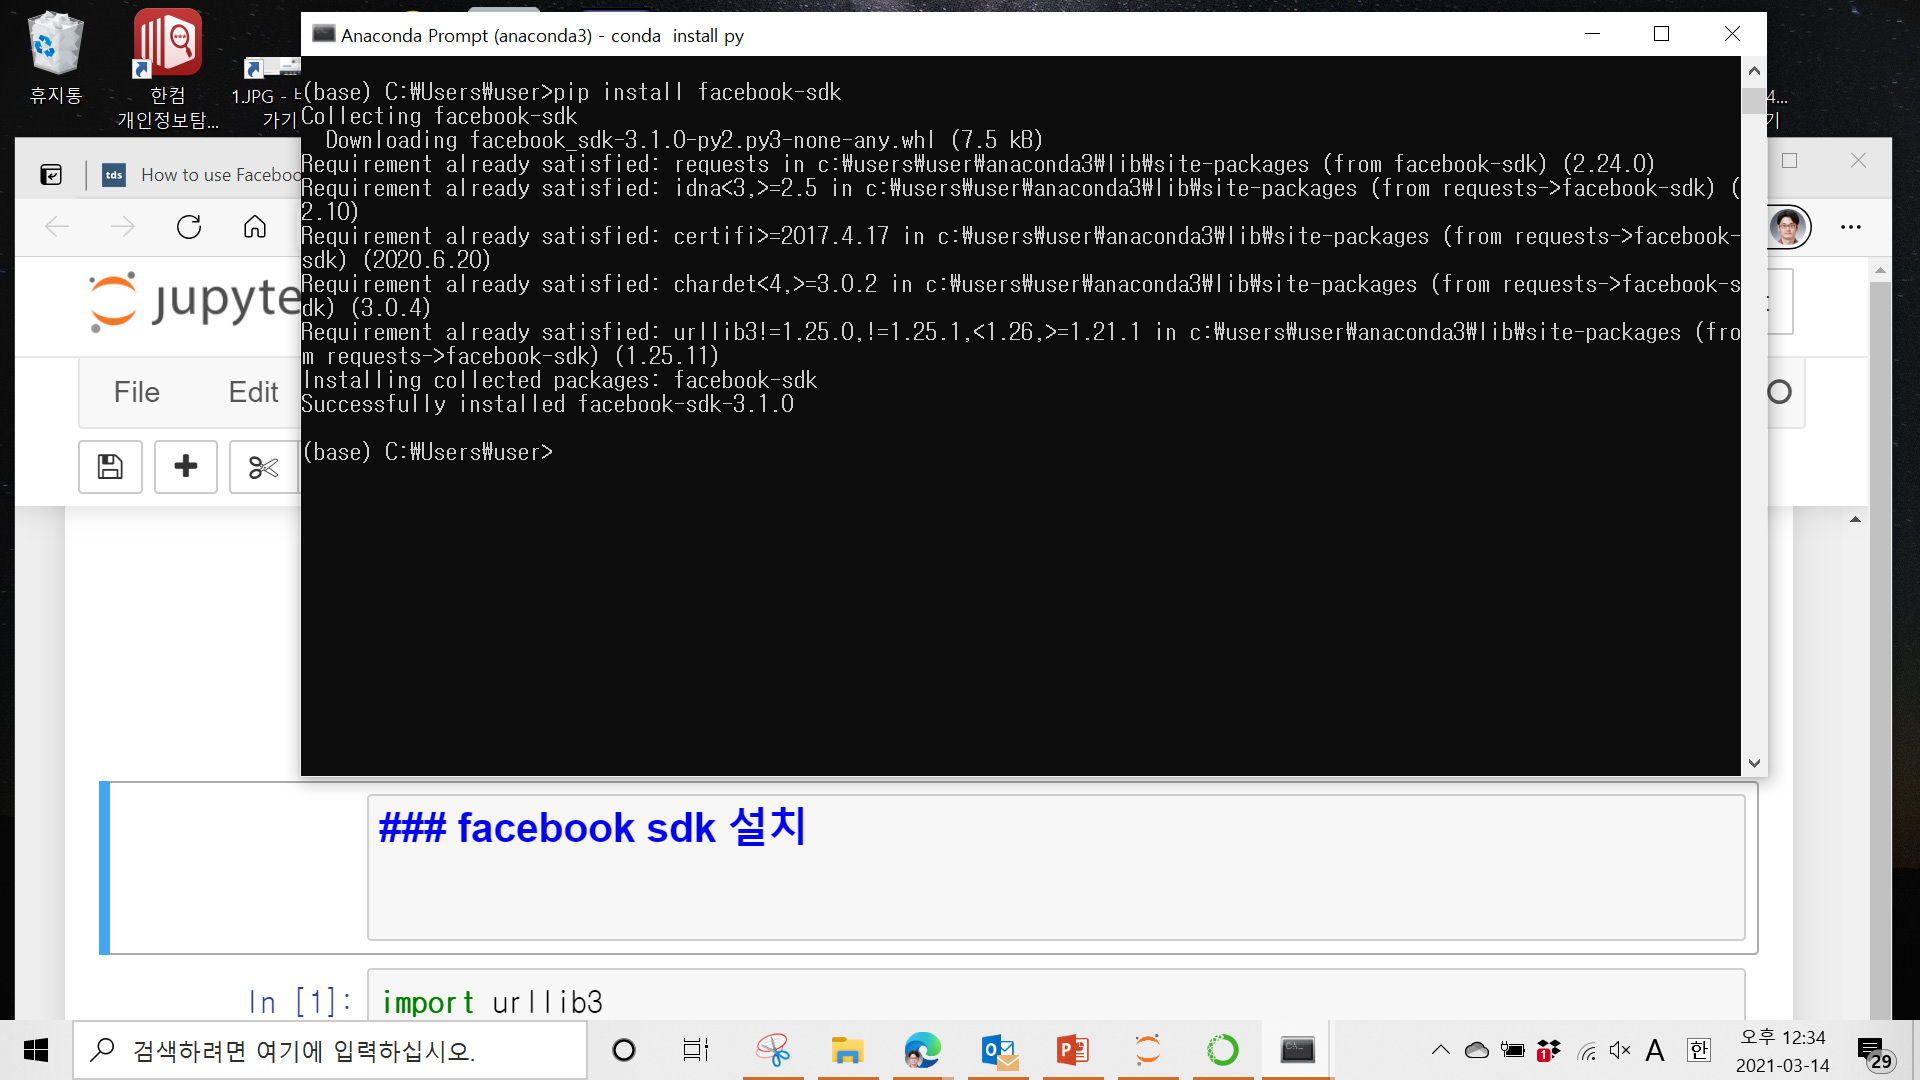

jupyter notebook kernel restart 필요


### api test


In [1]:
import urllib3
import facebook
import requests


token='EAAGpZCX4ggvgBAC5FJvAWSHv2Qbwy3Ko1SZBsrWTFskZAE4OXkWlrDp5eZC1c6IG6ZCSZCgfa1DHbq8ukGAncvVj2CrcCWOCcqn4jGvkdBFMILdzdZA8INCAwmlZASjvJtA4xDJnnqAfh8Vhg5d8uJ8cJGk9XzWmhyB95hmsHzZA3bAZDZD'
graph = facebook.GraphAPI(access_token=token)
profile = graph.request('/me?fields=id,name,email,picture')

print (profile)

{'id': '1729340367268876', 'name': '김준용', 'email': 'kingjykim@naver.com', 'picture': {'data': {'height': 50, 'is_silhouette': False, 'url': 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=1729340367268876&height=50&width=50&ext=1619109722&hash=AeQIYr0oPGaEDTcQg7c', 'width': 50}}}


### User api

https://developers.facebook.com/docs/graph-api/reference/user



In [2]:
graph = facebook.GraphAPI(access_token=token)
user = graph.request('/1729340367268876?fields=email')
print(user)

{'email': 'kingjykim@naver.com', 'id': '1729340367268876'}


## 과제 2 : 자신의 페북 계정의 profile 사진을 가져와 출력(jupyter notebook 내에)하는 프로그램을 작성하시오

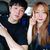

In [3]:
from PIL import Image
import requests

url = 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=1729340367268876&height=50&width=50&ext=1618915913&hash=AeTCSPvdLbskCw4n-8M'
img = Image.open(requests.get(url, stream=True).raw)
img

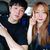

In [15]:
from PIL import Image
from io import BytesIO
graph = facebook.GraphAPI(access_token=token)
user = graph.request('/1729340367268876?fields=picture')
url = user['picture']['data']['url']

res = requests.get(url)

img = Image.open(BytesIO(res.content))
img

### Access token 확장 (유효기간 연장)

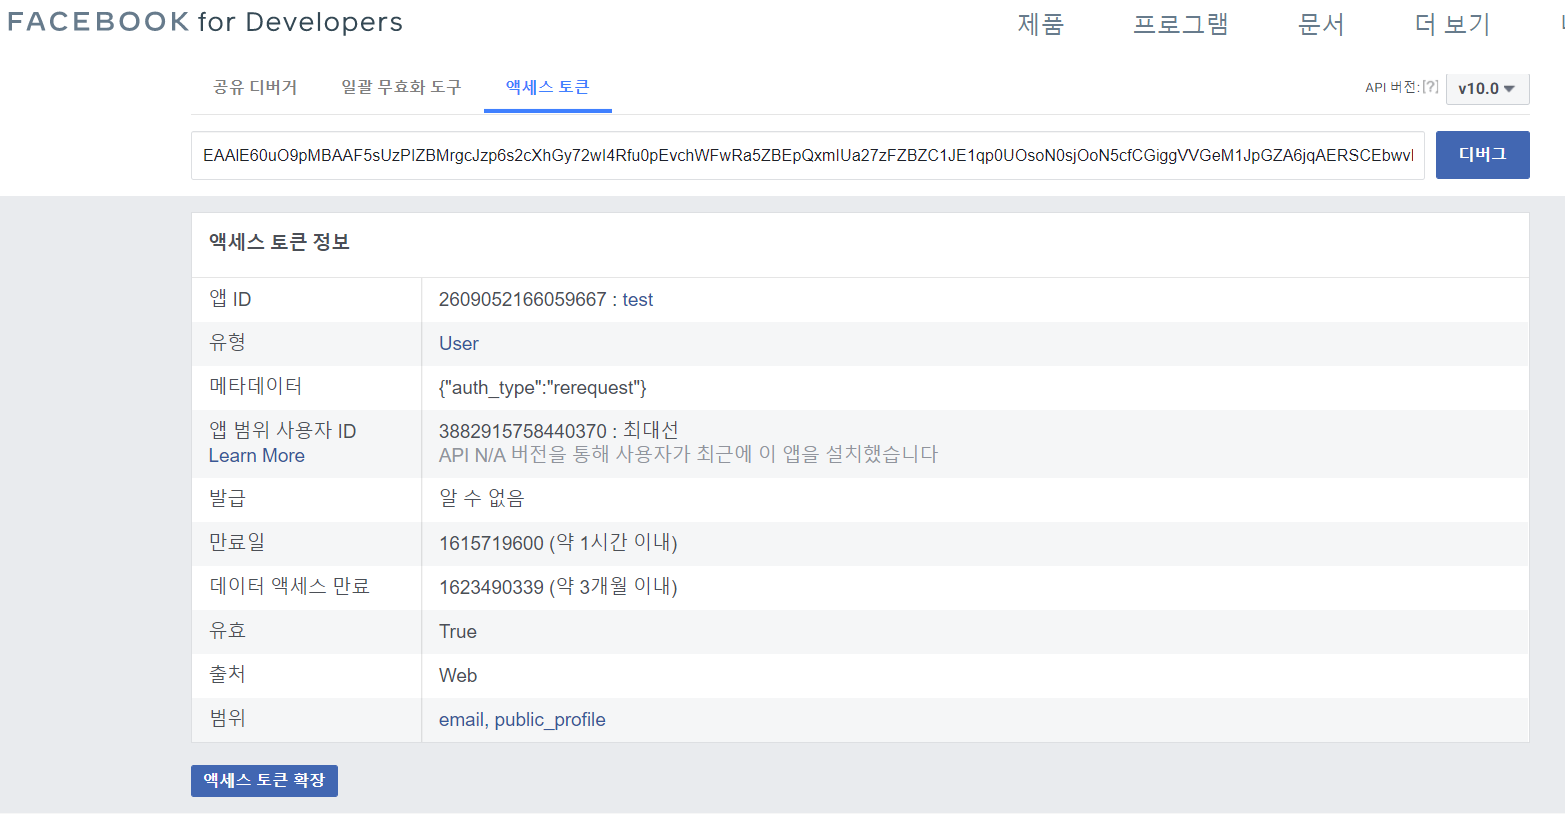

